## About Dataset

**The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues**

# **Goal**

Build a machine learning model for house price prediction with number of features available in this datasets

In [123]:
# supress warning
import warnings
warnings.filterwarnings('ignore')

## Import libraray and module

In [124]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Preprocessing

### **Data Loading**

In [177]:
df = pd.read_csv('data.csv')

In [178]:
df[0:500]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2014-05-12 00:00:00,950000.0,5.0,3.00,4530,258746,1.5,0,0,4,3200,1330,2003,0,20325 NE 198th St,Woodinville,WA 98077,USA
496,2014-05-12 00:00:00,185000.0,3.0,1.50,1370,8470,1.0,0,0,4,1370,0,1961,2001,2420 Dogwood St SE,Auburn,WA 98092,USA
497,2014-05-12 00:00:00,335000.0,3.0,2.50,1940,4927,2.0,0,0,3,1940,0,2004,2003,17217 Woodside Dr SE,Renton,WA 98058,USA
498,2014-05-12 00:00:00,210000.0,3.0,2.50,1040,2643,2.0,0,0,3,720,320,2004,2003,5145 S Roxbury St,Seattle,WA 98118,USA


### data inspection

In [179]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [180]:
df.shape

(4600, 18)

there are 4600 rows and 18 column or features in this datasets

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

in this datasets there are 4 float type column , 5 object type column and 9 are intiger type column 

object type column are also known as categorical column

In [182]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [183]:
correlation = df.corr()

correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


<AxesSubplot:>

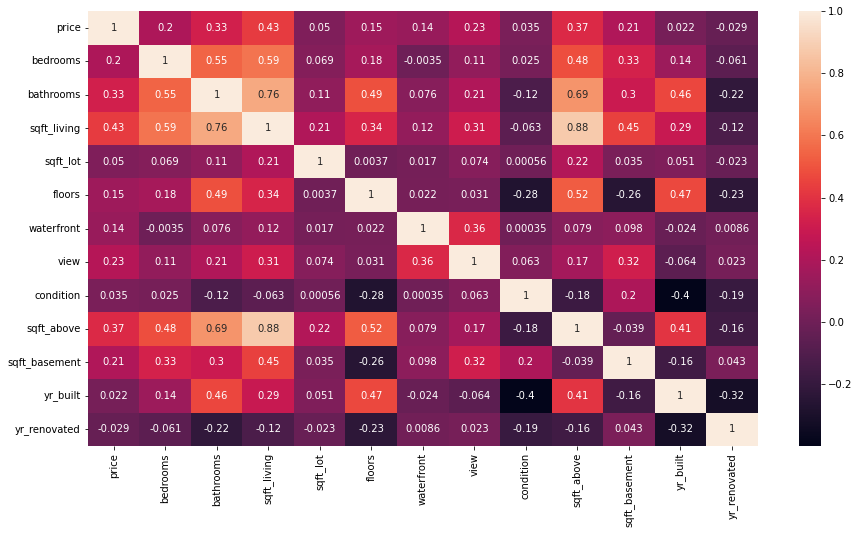

In [184]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation, annot= True)

lets see price of house highly correlated to bathroom, sqft_living, sqft_above features in this datastes

In [185]:
df.skew()

price            24.790933
bedrooms          0.456447
bathrooms         0.616033
sqft_living       1.723513
sqft_lot         11.307139
floors            0.551441
waterfront       11.682901
view              3.341586
condition         0.959068
sqft_above        1.494211
sqft_basement     1.642732
yr_built         -0.502155
yr_renovated      0.385919
dtype: float64

In [186]:
df['price'].value_counts()

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

lets see there are zero price present in this datasets so i will replace with NAN value

In [187]:
df['price']=df['price'].replace(0.0, np.nan)

lets see zero price will replaced with NAN  

after the NAN value replace with mean price of house

In [188]:
df.fillna(df.price.mean(), inplace=True)

In [189]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [190]:
# we also remove some feature because it don't affect the price of house directly 
df.drop(['sqft_lot','yr_built','yr_renovated', 'condition'], axis=1, inplace=True)  

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

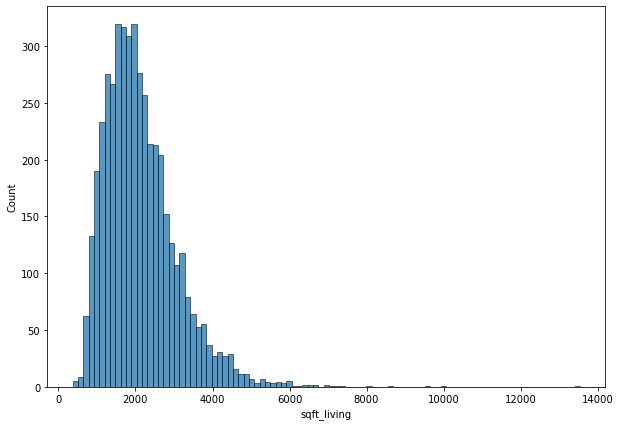

In [191]:
plt.figure(figsize=(10,7))
sns.histplot(df.sqft_living)

<AxesSubplot:xlabel='price', ylabel='Count'>

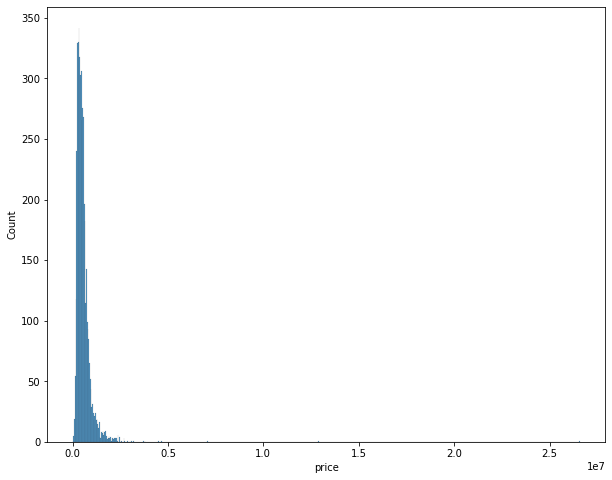

In [192]:
plt.figure(figsize=(10,8))
sns.histplot(df.price)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

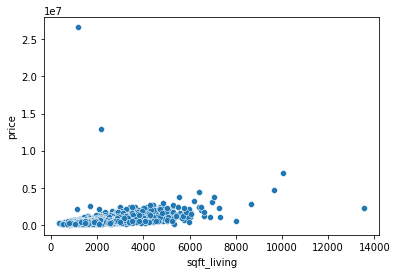

In [193]:
sns.scatterplot(data = df, x='sqft_living',y='price')

In [194]:
from scipy import stats
df['price'] = df['price'].replace([df['price'][np.abs(stats.zscore(df['price'])) > 3]],np.median(df['price']))

<AxesSubplot:xlabel='price', ylabel='Count'>

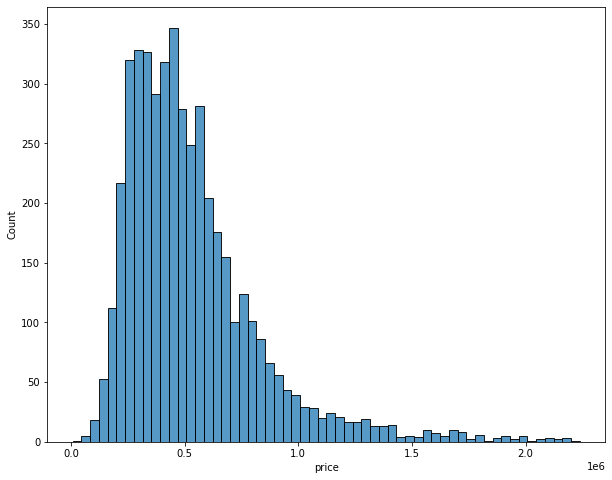

In [195]:
plt.figure(figsize=(10,8))
sns.histplot(x = df.price)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

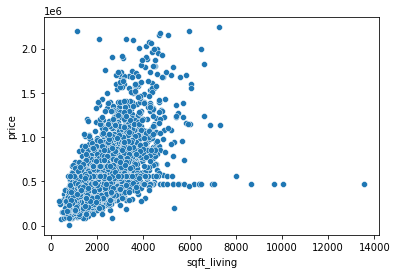

In [196]:
sns.scatterplot(data = df, x='sqft_living',y='price')

In [197]:
df.sqft_living.describe()

count     4600.000000
mean      2139.346957
std        963.206916
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2620.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [198]:
df['sqft_living'] = np.where((df.sqft_living >6000 ), 6000, df.sqft_living)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

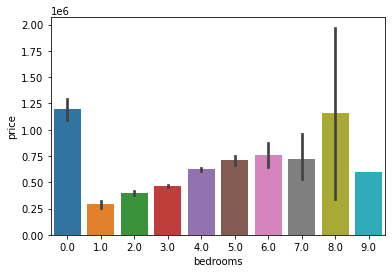

In [199]:
sns.barplot(x=df.bedrooms , y = df.price)

let's see some zero bedroom value in this bedroom feature so it replace with 8 because this is the highest vaue in this columns

In [200]:
df.bedrooms.replace(0, 8,inplace = True)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

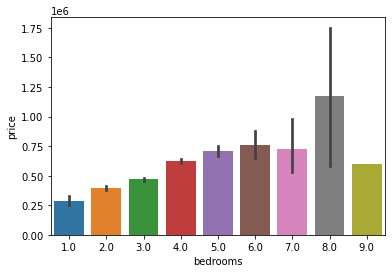

In [201]:
sns.barplot(x=df.bedrooms , y = df.price)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

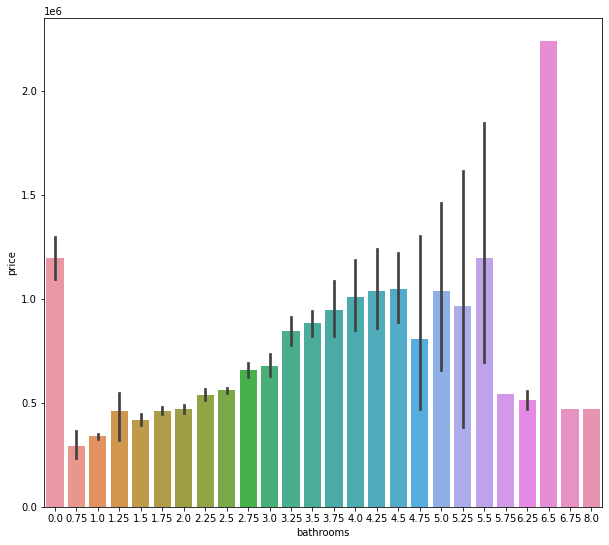

In [202]:
plt.figure(figsize=(10,9))
sns.barplot(x=df.bathrooms , y = df.price)

<AxesSubplot:xlabel='floors', ylabel='price'>

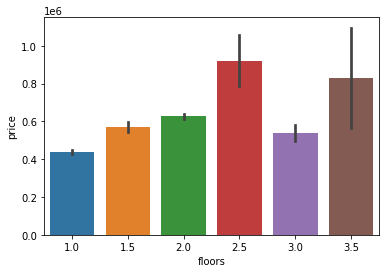

In [203]:
sns.barplot(x=df.floors , y = df.price)

<AxesSubplot:xlabel='view', ylabel='price'>

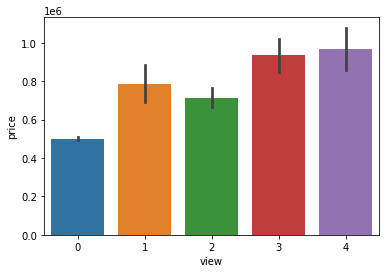

In [204]:
sns.barplot(x=df.view , y = df.price)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

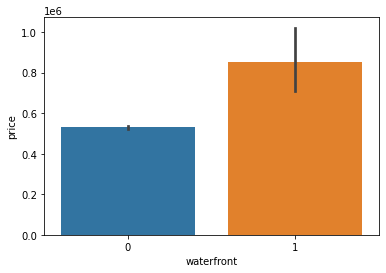

In [205]:

sns.barplot(x=df.waterfront , y = df.price)


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

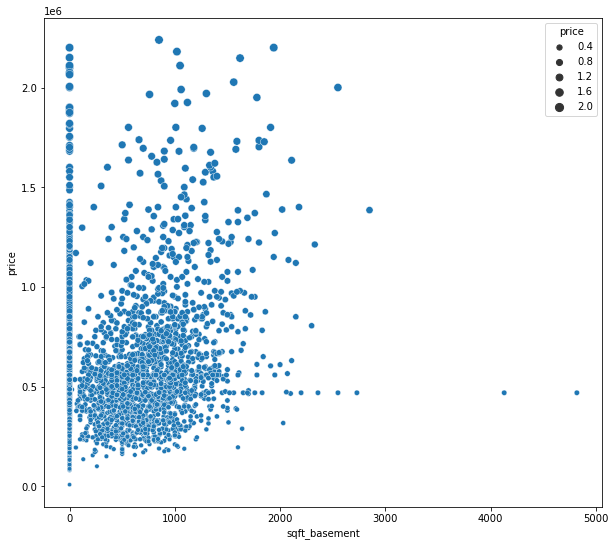

In [206]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='sqft_basement', y ='price', size='price' ,data= df)

In [207]:
df['sqft_basement'] = np.where((df.sqft_basement >2000 ), 2000, df.sqft_basement)

In [208]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,1.5,0,0,1340,0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,468750.0,5.0,2.5,3650,2.0,0,4,3370,280,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,1.0,0,0,1930,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [209]:
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [210]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,1.5,0,0,1340,0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,468750.0,5.0,2.50,3650,2.0,0,4,3370,280,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,1.0,0,0,1930,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,1.0,0,0,1000,1000,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,1.0,0,0,1140,800,9105 170th Ave NE,Redmond,WA 98052,USA


In [211]:
X = df.drop(["date",'street','statezip','price'], axis=1)
y = df[['price']]

X is the independent variable and another

y is the target variable

In [215]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'city', 'country'],
      dtype='object')

### **Make a dummy variable of Categorical column of city and country**

In [216]:
dummy = pd.get_dummies(X[['city', 'country']], drop_first=True)
dummy

,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4596,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [217]:
X = pd.concat([X, dummy], axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,country,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.0,1.50,1340,1.5,0,0,1340,0,Shoreline,USA,...,0,0,1,0,0,0,0,0,0,0
1,5.0,2.50,3650,2.0,0,4,3370,280,Seattle,USA,...,0,1,0,0,0,0,0,0,0,0
2,3.0,2.00,1930,1.0,0,0,1930,0,Kent,USA,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.25,2000,1.0,0,0,1000,1000,Bellevue,USA,...,0,0,0,0,0,0,0,0,0,0
4,4.0,2.50,1940,1.0,0,0,1140,800,Redmond,USA,...,0,0,0,0,0,0,0,0,0,0


In [218]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'city', 'country', 'city_Auburn',
       'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond',
       'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Inglewood-Finn Hill',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Lake Forest Park', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_Milton', 'city_Newcastle',
       'city_Normandy Park', 'city_North Bend', 'city_Pacific', 'city_Preston',
       'city_Ravensdale', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish',
       'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarrow Po

In [219]:
X = X.drop(['city', 'country'], axis=1)


In [220]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'city_Auburn', 'city_Beaux Arts Village',
       'city_Bellevue', 'city_Black Diamond', 'city_Bothell', 'city_Burien',
       'city_Carnation', 'city_Clyde Hill', 'city_Covington',
       'city_Des Moines', 'city_Duvall', 'city_Enumclaw', 'city_Fall City',
       'city_Federal Way', 'city_Inglewood-Finn Hill', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Lake Forest Park',
       'city_Maple Valley', 'city_Medina', 'city_Mercer Island', 'city_Milton',
       'city_Newcastle', 'city_Normandy Park', 'city_North Bend',
       'city_Pacific', 'city_Preston', 'city_Ravensdale', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_SeaTac', 'city_Seattle',
       'city_Shoreline', 'city_Skykomish', 'city_Snoqualmie',
       'city_Snoqualmie Pass', 'city_Tukwila', 'city_Vashon',
       'city_Woodinville', 'city_Yarrow Point'],
      dtype=

In [241]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   # regr = RandomForestRegressor(max_depth=2, random_state=0)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split

In [222]:
X.head(3)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city_Auburn,city_Beaux Arts Village,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.0,1.5,1340,1.5,0,0,1340,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,2.5,3650,2.0,0,4,3370,280,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3.0,2.0,1930,1.0,0,0,1930,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature scaling

In [224]:
# we perform standard scaler on this data because variable in tis datasets with different units i not be batter for linear model
scaler = StandardScaler()
X[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement']] = scaler.fit_transform(X[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement']])
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city_Auburn,city_Beaux Arts Village,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,-0.443834,-0.843204,-0.857131,-0.022416,-0.085004,-0.309194,-0.565224,-0.684706,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.751476,0.432802,1.639466,0.906555,-0.085004,4.830079,1.789559,-0.066130,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.443834,-0.205201,-0.219472,-0.951388,-0.085004,-0.309194,0.119171,-0.684706,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.443834,0.113800,-0.143818,-0.951388,-0.085004,-0.309194,-0.959621,1.524496,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.653821,0.432802,-0.208664,-0.951388,-0.085004,-0.309194,-0.797222,1.082656,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.443834,-0.524202,-0.673399,-0.951388,-0.085004,-0.309194,-0.368025,-0.684706,0,0,...,0,1,0,0,0,0,0,0,0,0
4596,-0.443834,0.432802,-0.727438,0.906555,-0.085004,-0.309194,-0.426025,-0.684706,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,-0.443834,0.432802,0.947768,0.906555,-0.085004,-0.309194,1.371962,-0.684706,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0.653821,-0.205201,-0.046548,-0.951388,-0.085004,-0.309194,-0.878421,1.568680,0,0,...,0,1,0,0,0,0,0,0,0,0


## Spliting the data 

In [231]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## LinearRegreesion model

In [286]:
lr = LinearRegression()
lr.fit(X_train, y_train)  #phase d’apprentissage

# make prediction on test data
y_pred = lr.predict(X_test)

# Make predictions using train data
y_train_pred = lr.predict(X_train)

# F1 on train set
r2_train = r2_score(y_train, y_train_pred)

# F1 on test set
r2_test = r2_score(y_test, y_pred)
  
print("Linear_regression model score for train is : " , lr.score(X_train, y_train))
print("Linear_regression model score for test is : " , lr.score(X_test,y_test))

print('Performance Metrics for Linear_regression model is :')

print('[r2-Score Train]:', r2_train)

print('[r2-Score Test]:', r2_test)
print('--------------------\n')


Linear_regression model score for train is :  0.6267874099700083
Linear_regression model score for test is :  0.5645862393127717
Performance Metrics for Linear_regression model is :
[r2-Score Train]: 0.6267874099700083
[r2-Score Test]: 0.5645862393127717
--------------------



## KNN model

In [277]:
kn = KNeighborsRegressor(n_neighbors=12)
kn.fit(X_train, y_train)  #phase d’apprentissage

# make prediction on test data
y_pred = kn.predict(X_test)

# Make predictions using train data
y_train_pred = kn.predict(X_train)

# F1 on train set
r2_train = r2_score(y_train, y_train_pred)

# F1 on test set
r2_test = r2_score(y_test, y_pred)
  
print("KNN score for train is : " , kn.score(X_train, y_train))
print("KNN score for test is : " , kn.score(X_test,y_test))

print('Performance Metrics for KNN model is :')

print('[r2-Score Train]:', r2_train)

print('[r2-Score Test]:', r2_test)
print('--------------------\n')


KNN score for train is :  0.633070287488628
KNN score for test is :  0.5276304128282234
Performance Metrics for KNN model is :
[r2-Score Train]: 0.633070287488628
[r2-Score Test]: 0.5276304128282234
--------------------



## Rnadom forest Model 

In [290]:
rf_model = RandomForestRegressor(n_estimators=5, max_depth=6)
rf_model.fit(X_train, y_train)  #phase d’apprentissage

# make prediction on test data
y_pred = rf_model.predict(X_test)

# Make predictions using train data
y_train_pred = rf_model.predict(X_train)

# F1 on train set
r2_train = r2_score(y_train, y_train_pred)

# F1 on test set
r2_test = r2_score(y_test, y_pred)
  
print("Random forest model score for train is : " , rf_model.score(X_train, y_train))
print("Random forest model score for test is : " , rf_model.score(X_test,y_test))

print('Performance Metrics for Random forest  model is :')

print('[r2-Score Train]:', r2_train)

print('[r2-Score Test]:', r2_test)
print('--------------------\n')


Random forest model score for train is :  0.6605118299283035
Random forest model score for test is :  0.5167227154206266
Performance Metrics for Random forest  model is :
[r2-Score Train]: 0.6605118299283035
[r2-Score Test]: 0.5167227154206266
--------------------

